In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from graphviz import Digraph
from decision_tree import DecisionTree

In [2]:
# Load data and split into train test
dt = load_breast_cancer()
X = pd.DataFrame(dt.data, columns= list(dt.feature_names))
X.columns = X.columns.map(lambda x: x.replace(' ', '_'))
y = pd.Series(dt.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [3]:
# Initialize a DecisionTree object
tree = DecisionTree( max_depth= 2, min_instance_ratio=0.01, candidate_lambdas = [1])
# Train the tree
tree.fit(X_train, y_train)

best_lambda: 1, feature: worst_concave_points, threshold: 0.1417 Depth: 0
best_lambda: 1, feature: worst_area, threshold: 957.45 Depth: 1
best_lambda: 1, feature: radius_error, threshold: 1.0476 Depth: 2
best_lambda: 1, feature: worst_concavity, threshold: 0.1907 Depth: 2
best_lambda: 1, feature: mean_perimeter, threshold: 71.815 Depth: 1
best_lambda: 1, feature: texture_error, threshold: 0.458 Depth: 2


In [4]:
# Make predictions
predictions = tree.predict(X_test)

        Metric     Value
0     Accuracy  0.947368
1    Precision  0.957746
2       Recall  0.957746
3     F1 Score  0.957746
4          MCC  0.887979
5  Cohen Kappa  0.887979
6      AUC-ROC  0.943990
7       AUC-PR  0.970904


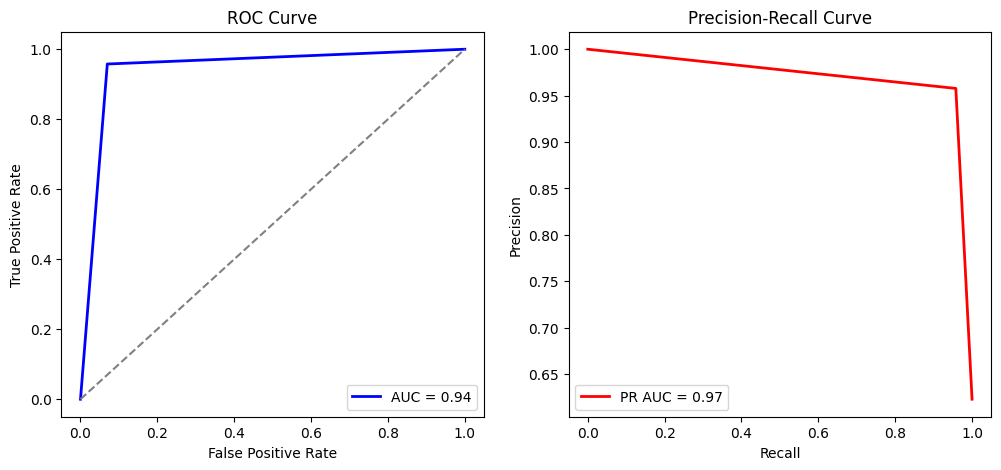

In [5]:
# Evaluate performance
metrics_df = tree.performance_metrics(X_test, y_test)

In [6]:
# Extract rules
rules = tree.extract_rules()
for rule in rules:
    print(rule)

[('worst_concave_points', '<=', 0.1417), ('worst_area', '<=', 957.45), ('radius_error', '<=', 1.0476)]


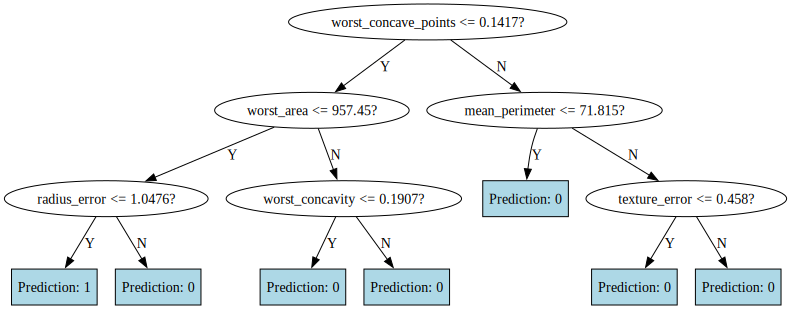

In [7]:
# Plot tree
graph = Digraph(format='png')
_ = tree.plot_tree(graph=graph)
display(graph)

In [11]:
homogeneity_rules, complementary_rules = tree.extract_homogenity_and_complementary_rules(tree.root)

print("homogeneity rules:")
for rule_dict in homogeneity_rules:
    print("-", rule_dict['rule'], "--> Class", rule_dict['class'])
    #print("-", rule_str)

print("\ncomplementary rules:")
for rule_dict in complementary_rules:
    print("-", rule_dict, )

homogeneity rules:
- (worst_concave_points > 0.1417) AND (mean_perimeter > 71.815) AND (texture_error > 0.458) --> Class 0
- (worst_area > 957.45) AND (worst_concavity > 0.1907) --> Class 0
- (radius_error > 1.0476) --> Class 0
-  --> Class 1

complementary rules:
- (worst_concave_points <= 0.1417)
- (worst_area <= 957.45)
- (radius_error <= 1.0476)


In [9]:
concise_rules = tree.safe_concise_rule_pruning(homogeneity_rules, complementary_rules, X, y, alpha=0.05)
concise_rules

[{'rule': '(worst_concave_points > 0.1417) AND (mean_perimeter > 71.815) AND (texture_error > 0.458)',
  'class': 0},
 {'rule': '(worst_area > 957.45) AND (worst_concavity > 0.1907)', 'class': 0},
 {'rule': '(worst_concave_points <= 0.1417) AND (worst_area <= 957.45) AND (radius_error > 1.0476)',
  'class': 0}]